# COVID19 Global Forecasting (Week 1)

![COVID19 Global Forecasting (Week 1)](covid19.png)

### Import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [4]:
dataset_train=pd.read_csv("train.csv")
dataset_train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [5]:
dataset_train.shape

(17892, 8)

In [10]:
dataset_test=pd.read_csv("test.csv")
dataset_test.tail()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
12207,12208,NaN,Zambia,-15.4167,28.2833,2020-04-19
12208,12209,NaN,Zambia,-15.4167,28.2833,2020-04-20
12209,12210,NaN,Zambia,-15.4167,28.2833,2020-04-21
12210,12211,NaN,Zambia,-15.4167,28.2833,2020-04-22
12211,12212,NaN,Zambia,-15.4167,28.2833,2020-04-23


In [11]:
dataset_test.shape

(12212, 6)

### Data preprocessing

In [12]:
dataset_train.isnull().sum()#more than 50% data are null

Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [13]:
dataset_test.isnull().sum()#more than 50% data are null

ForecastId           0
Province/State    6622
Country/Region       0
Lat                  0
Long                 0
Date                 0
dtype: int64

In [14]:
del dataset_train['Province/State']
del dataset_test['Province/State']

In [15]:
for i in dataset_train:
    print(i,":",len(dataset_train[i].unique()))#unique value of all columns

Id : 17892
Country/Region : 163
Lat : 272
Long : 276
Date : 63
ConfirmedCases : 1023
Fatalities : 204


In [16]:
for i in dataset_test:
    print(i,":",len(dataset_test[i].unique()))#unique value of all columns

ForecastId : 12212
Country/Region : 163
Lat : 272
Long : 276
Date : 43


In [17]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17892 non-null  int64  
 1   Country/Region  17892 non-null  object 
 2   Lat             17892 non-null  float64
 3   Long            17892 non-null  float64
 4   Date            17892 non-null  object 
 5   ConfirmedCases  17892 non-null  float64
 6   Fatalities      17892 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 978.6+ KB


In [18]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      12212 non-null  int64  
 1   Country/Region  12212 non-null  object 
 2   Lat             12212 non-null  float64
 3   Long            12212 non-null  float64
 4   Date            12212 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 477.2+ KB


### Label Encoder

In [19]:
label_encoder=preprocessing.LabelEncoder()
dataset_train['Country/Region_type']=label_encoder.fit_transform(dataset_train["Country/Region"])
dataset_train['Date_type']=label_encoder.fit_transform(dataset_train["Date"])
del dataset_train['Country/Region']
del dataset_train['Date']

In [20]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   17892 non-null  int64  
 1   Lat                  17892 non-null  float64
 2   Long                 17892 non-null  float64
 3   ConfirmedCases       17892 non-null  float64
 4   Fatalities           17892 non-null  float64
 5   Country/Region_type  17892 non-null  int64  
 6   Date_type            17892 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 978.6 KB


In [21]:
label_encoder=preprocessing.LabelEncoder()
dataset_test['Country/Region_type']=label_encoder.fit_transform(dataset_test["Country/Region"])
dataset_test['Date_type']=label_encoder.fit_transform(dataset_test["Date"])
del dataset_test['Country/Region']
del dataset_test['Date']

In [22]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ForecastId           12212 non-null  int64  
 1   Lat                  12212 non-null  float64
 2   Long                 12212 non-null  float64
 3   Country/Region_type  12212 non-null  int64  
 4   Date_type            12212 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 477.2 KB


### EDA

<Axes: xlabel='Date_type', ylabel='ConfirmedCases'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

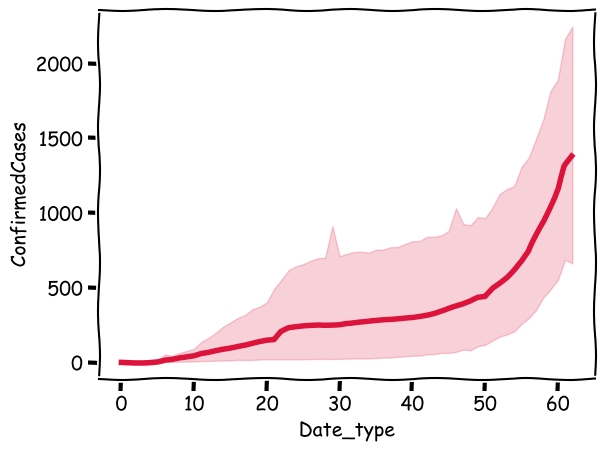

In [23]:
sns.lineplot(x='Date_type',y='ConfirmedCases',data=dataset_train,color='crimson',lw=4,ls='solid')

<Axes: xlabel='Date_type', ylabel='Fatalities'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

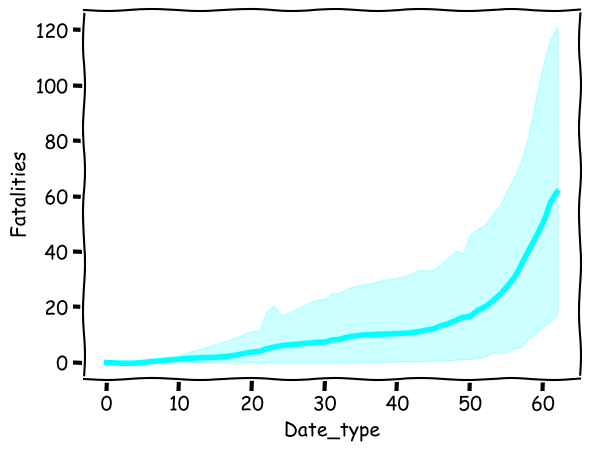

In [24]:
sns.lineplot(x='Date_type',y='Fatalities',data=dataset_train,color='cyan',lw=4,ls='solid')

<Axes: xlabel='Country/Region_type', ylabel='ConfirmedCases'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

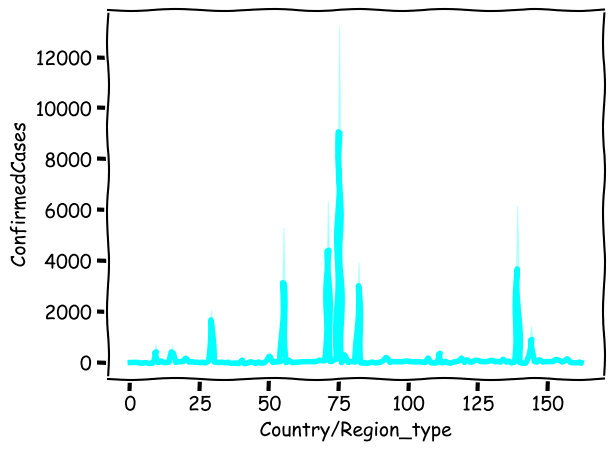

In [25]:
sns.lineplot(x='Country/Region_type',y='ConfirmedCases',data=dataset_train,color='cyan',lw=4,ls='solid')

Text(0, 0.5, 'Fatalities')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

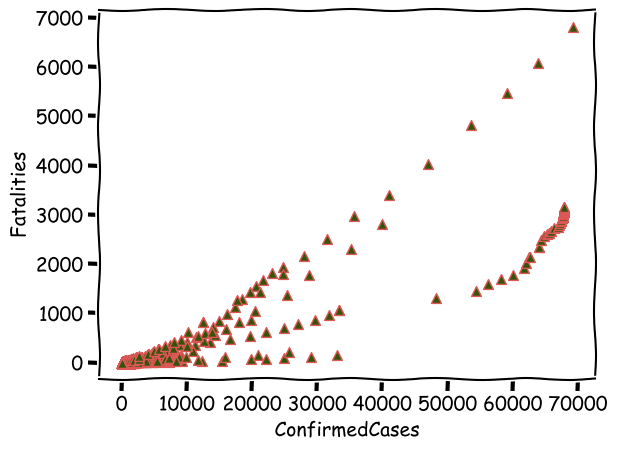

In [26]:
x = dataset_train['ConfirmedCases']
y = dataset_train['Fatalities']
plt.scatter(x, y, 
            c ="#35530a",#color of marker
            linewidths = 1, #width of marker
            marker ="^", #shape of marker
            edgecolor ="#db5856", #edge color of marker
            s = 50) #size of marker

plt.xlabel("ConfirmedCases")
plt.ylabel("Fatalities")

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

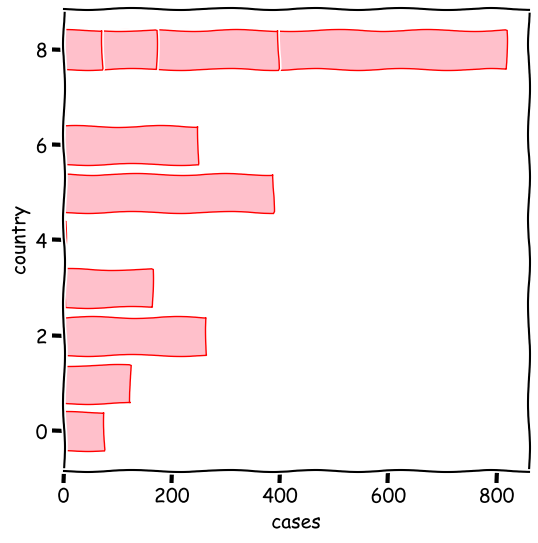

In [27]:
name = dataset_train['Country/Region_type']
case = dataset_train['ConfirmedCases']
 
# Figure Size
fig = plt.figure(figsize =(6, 6))
 
# plt.barh is used for draw all bar horizontally
plt.barh(name[0:1000], case[0:1000], color='pink', edgecolor='r', linewidth=1)

plt.xlabel("cases")
plt.ylabel("country")

plt.show()

<Axes: xlabel='ConfirmedCases', ylabel='Density'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

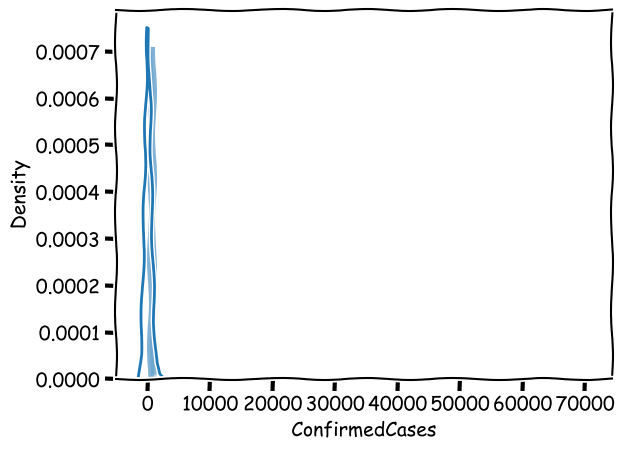

In [28]:
sns.distplot(dataset_train['ConfirmedCases'])

<Axes: xlabel='Fatalities', ylabel='Density'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

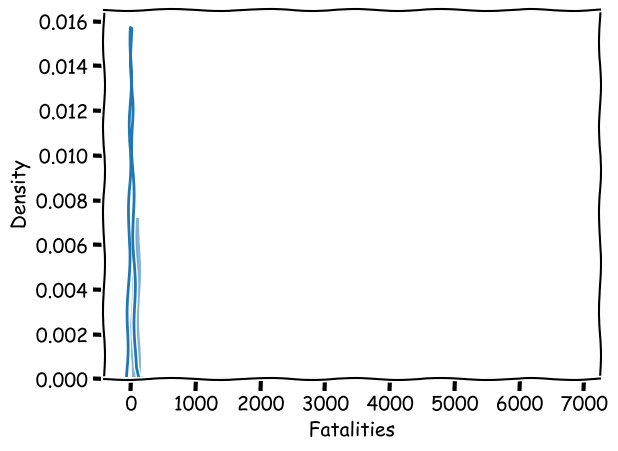

In [29]:
sns.distplot(dataset_train['Fatalities'])

### Split the data

In [30]:
#split the data into x and y 
x=dataset_train[['Country/Region_type', 'Lat', 'Long', 'Date_type']]
y1=dataset_train['ConfirmedCases']
y2=dataset_train['Fatalities']
#here we will take y1 and y2 because we have to find two results 
#you could merege the column by space or comma
test = dataset_test[['Country/Region_type', 'Lat', 'Long', 'Date_type']]

In [31]:
x

,Country/Region_type,Lat,Long,Date_type
0,0,33.0000,65.0000,0
1,0,33.0000,65.0000,1
2,0,33.0000,65.0000,2
3,0,33.0000,65.0000,3
4,0,33.0000,65.0000,4
...,...,...,...,...
17887,162,-15.4167,28.2833,58
17888,162,-15.4167,28.2833,59
17889,162,-15.4167,28.2833,60
17890,162,-15.4167,28.2833,61


In [32]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17887    2.0
17888    2.0
17889    3.0
17890    3.0
17891    3.0
Name: ConfirmedCases, Length: 17892, dtype: float64

In [33]:
y2

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17887    0.0
17888    0.0
17889    0.0
17890    0.0
17891    0.0
Name: Fatalities, Length: 17892, dtype: float64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=10,random_state=10)

### Model Selection

In [35]:
from sklearn import tree
model1= tree.DecisionTreeClassifier()
num_trees=100
model1= model1.fit(x_train,y_train)

### Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier

# BaggingClassifier için düzenlenmiş, kaynak dostu versiyon
bag_clf = BaggingClassifier(
    estimator=model1,   # Decision Tree modelin
    n_estimators=30,    # ağaç sayısını azaltarak RAM kullanımını düşürdük
    bootstrap=True,
    n_jobs=1,           # tek çekirdek ile çalışacak
    random_state=42
)

# Modeli eğit
bag_clf.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=30, n_jobs=1,
                  random_state=42)

In [39]:
bag_clf.score(x_test,y_test)*100#accuracy

90.0

In [40]:
pred1 = bag_clf.predict(x_test)
pred1

array([935.,   0.,   0.,   4.,   1.,   0.,   0.,   0.,   0.,   0.])

In [41]:
bag_clf.fit(x,y2)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=30, n_jobs=1,
                  random_state=42)

In [42]:
pred2 = bag_clf.predict(x_test)
pred2

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
cases = pd.DataFrame(pred1,columns=['ConfirmedCases'])
cases

,ConfirmedCases
0,935.0
1,0.0
2,0.0
3,4.0
4,1.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [44]:
fatalities= pd.DataFrame(pred2,columns=['Fatalities'])
fatalities

,Fatalities
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [45]:
final1 = pd.concat([cases,fatalities], axis=1, join='inner')
display(final1)

,ConfirmedCases,Fatalities
0,935.0,1.0
1,0.0,0.0
2,0.0,0.0
3,4.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [49]:
test1=pd.read_csv("test.csv")
test1.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [50]:
test2=test1["ForecastId"]
res = np.array(test2)
res

array([    1,     2,     3, ..., 12210, 12211, 12212], shape=(12212,))

In [51]:
final2 = pd.DataFrame(res, columns =['ForecastId'])
final2

,ForecastId
0,1
1,2
2,3
3,4
4,5
...,...
12207,12208
12208,12209
12209,12210
12210,12211


In [52]:
submission = pd.concat([final2,final1], axis=1, join='inner')
display(submission)

,ForecastId,ConfirmedCases,Fatalities
0,1,935.0,1.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,4.0,0.0
4,5,1.0,0.0
5,6,0.0,0.0
6,7,0.0,0.0
7,8,0.0,0.0
8,9,0.0,0.0
9,10,0.0,0.0


In [53]:
submission.set_index("ForecastId", inplace=True)
submission.to_csv("submission.csv")

In [54]:
pd.read_csv("submission.csv")

,ForecastId,ConfirmedCases,Fatalities
0,1,935.0,1.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,4.0,0.0
4,5,1.0,0.0
5,6,0.0,0.0
6,7,0.0,0.0
7,8,0.0,0.0
8,9,0.0,0.0
9,10,0.0,0.0


### Summary